<a href="https://colab.research.google.com/github/chaitra0312/ML/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy pandas matplotlib tensorflow scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# Load the Tesla stock data (already cleaned earlier)
df = pd.read_csv("/content/tesla-stock-price.csv", parse_dates=["date"], index_col="date")
df = df[["close"]].dropna()  # Keep only closing prices

# Normalize the data using MinMaxScaler (values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Define the training set size (80% of data)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create sequences for LSTM
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step, 0])
        y.append(data[i+time_step, 0])
    return np.array(X), np.array(y)

# Create training and testing sequences
time_step = 60  # Use last 60 days to predict the next day
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

# Reshape input to fit LSTM model (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


<ipython-input-10-be07a2bce139>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("/content/tesla-stock-price.csv", parse_dates=["date"], index_col="date")


In [ ]:
# Build the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error")

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - loss: 0.2219 - val_loss: 0.0076
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0206 - val_loss: 0.0085
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0148 - val_loss: 0.0069
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - loss: 0.0122 - val_loss: 0.0069
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.0125 - val_loss: 0.0071
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0120 - val_loss: 0.0069
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0100 - val_loss: 0.0066
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0100 - val_loss: 0.0067
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0111 - val_loss: 0.0062
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - loss: 0.0103 - val_loss: 0.0060
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0086 - val_loss: 0.0059
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss

In [ ]:
# Predict on test data
predicted_prices = model.predict(X_test)

# Convert predictions back to original scale
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 367ms/step


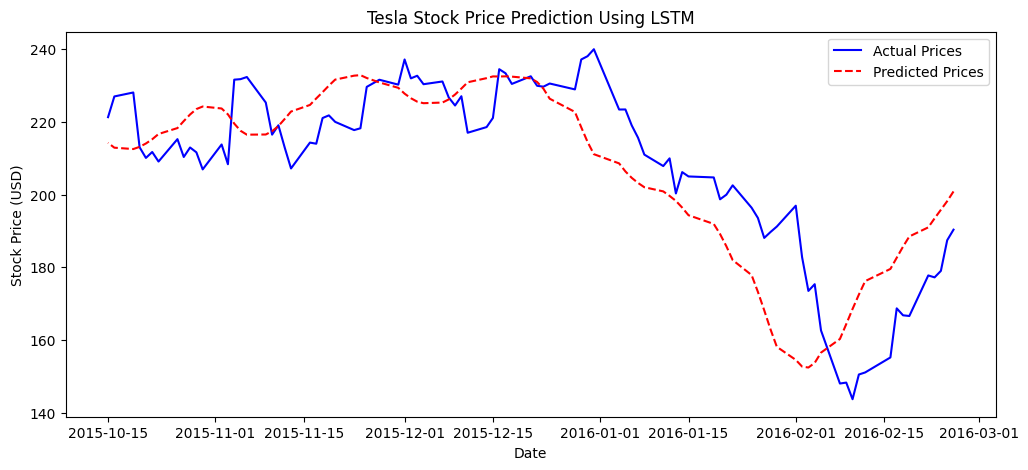

In [ ]:
# Plot actual vs predicted prices
plt.figure(figsize=(12,5))
plt.plot(df.index[-len(actual_prices):], actual_prices, label="Actual Prices", color="blue")
plt.plot(df.index[-len(predicted_prices):], predicted_prices, label="Predicted Prices", color="red", linestyle="dashed")
plt.title("Tesla Stock Price Prediction Using LSTM")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━

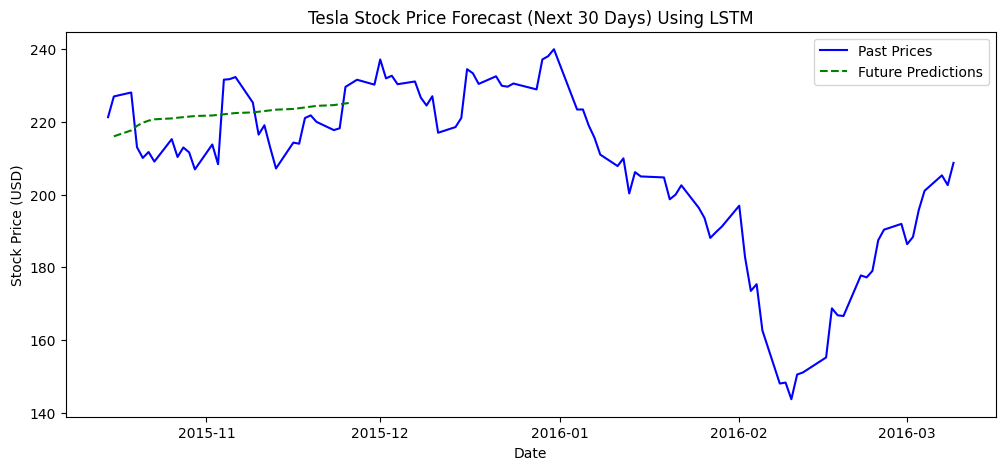

In [ ]:
# Predict next 30 days
future_predictions = []
last_60_days = test_data[-time_step:].reshape(1, time_step, 1)  # Get the last 60 days data

for _ in range(30):  # Predict 30 days ahead
    next_day = model.predict(last_60_days)[0, 0]
    future_predictions.append(next_day)

    # Update last_60_days with new prediction
    last_60_days = np.append(last_60_days[:,1:,:], [[[next_day]]], axis=1)

# Convert predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create future dates
future_dates = pd.date_range(start=df.index[-1], periods=31, freq='B')[1:]

# Plot future predictions
plt.figure(figsize=(12,5))
plt.plot(df.index[-100:], df["close"].values[-100:], label="Past Prices", color="blue")
plt.plot(future_dates, future_predictions, label="Future Predictions", color="green", linestyle="dashed")
plt.title("Tesla Stock Price Forecast (Next 30 Days) Using LSTM")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()
